# Problem Statement

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

# Step 1: Data reading and insight


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('seaborn-deep')

import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
seed = 12
np.random.seed(seed)

from datetime import date

In [2]:
house_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')
house_df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# important funtions
def datasetShape(df):
    rows, cols = df.shape
    print("The dataframe has",rows,"rows and",cols,"columns.")
    
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number]).drop('price', axis=1)
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [4]:
# check dataset shape
datasetShape(house_df)

# check for duplicates
if(len(house_df) == len(house_df['id'].unique())):
    print("No duplicates found!!")
else:
    print("Duplicates occuring")

The dataframe has 21613 rows and 21 columns.
Duplicates occuring


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Step 2: EDA

In [7]:
# check null values

pd.DataFrame(house_df.isnull().sum(), columns=["Null Count"]).style.background_gradient(cmap='Blues')

,Null Count
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


<AxesSubplot:>

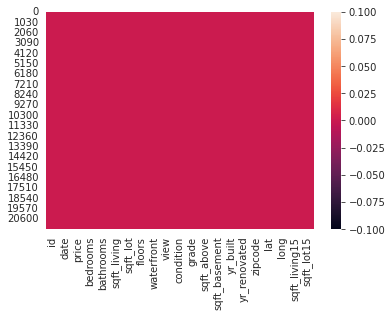

In [8]:
sns.heatmap(house_df.isnull())

In [9]:
numerical_features, categorical_features = divideFeatures(house_df)

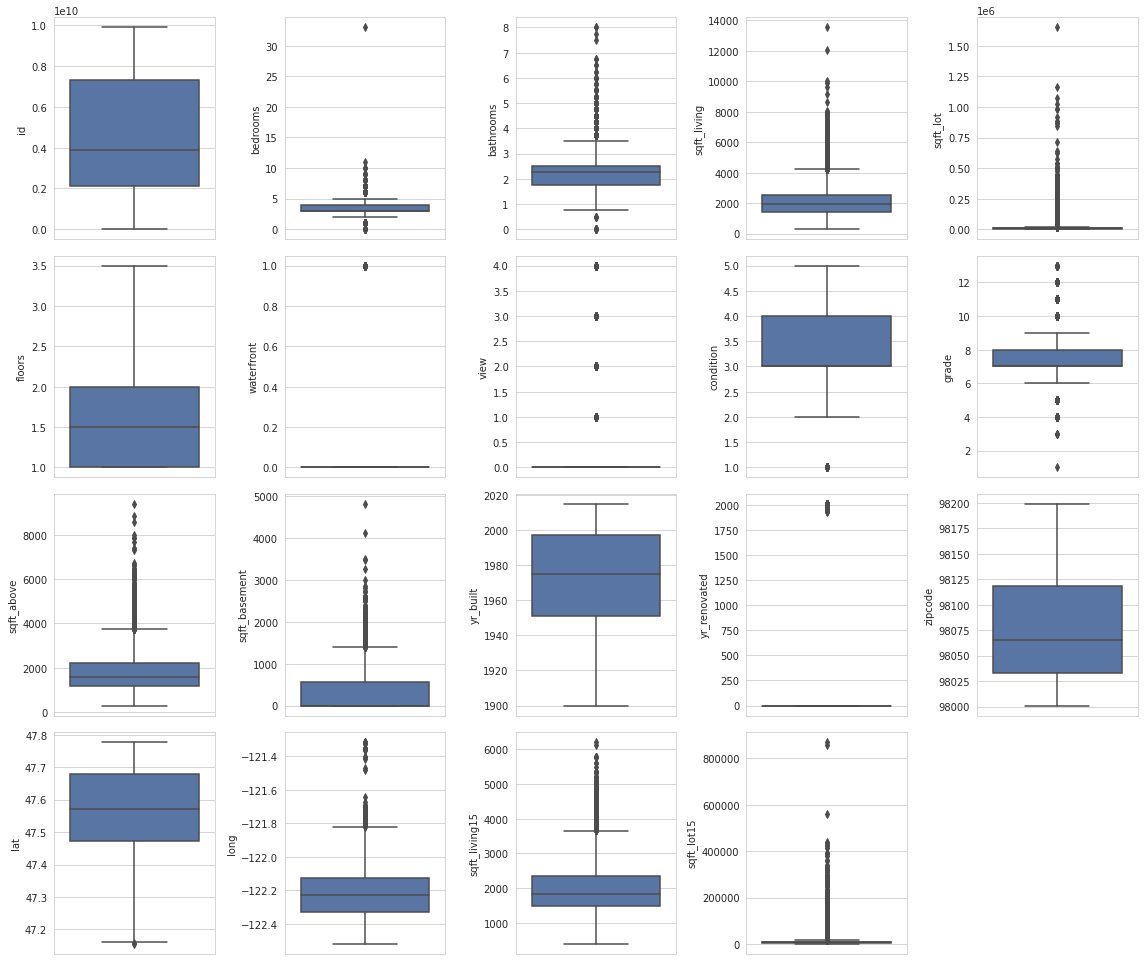

In [10]:
# boxplots of numerical features for outlier detection

fig = plt.figure(figsize=(16,30))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])
plt.tight_layout()
plt.show()

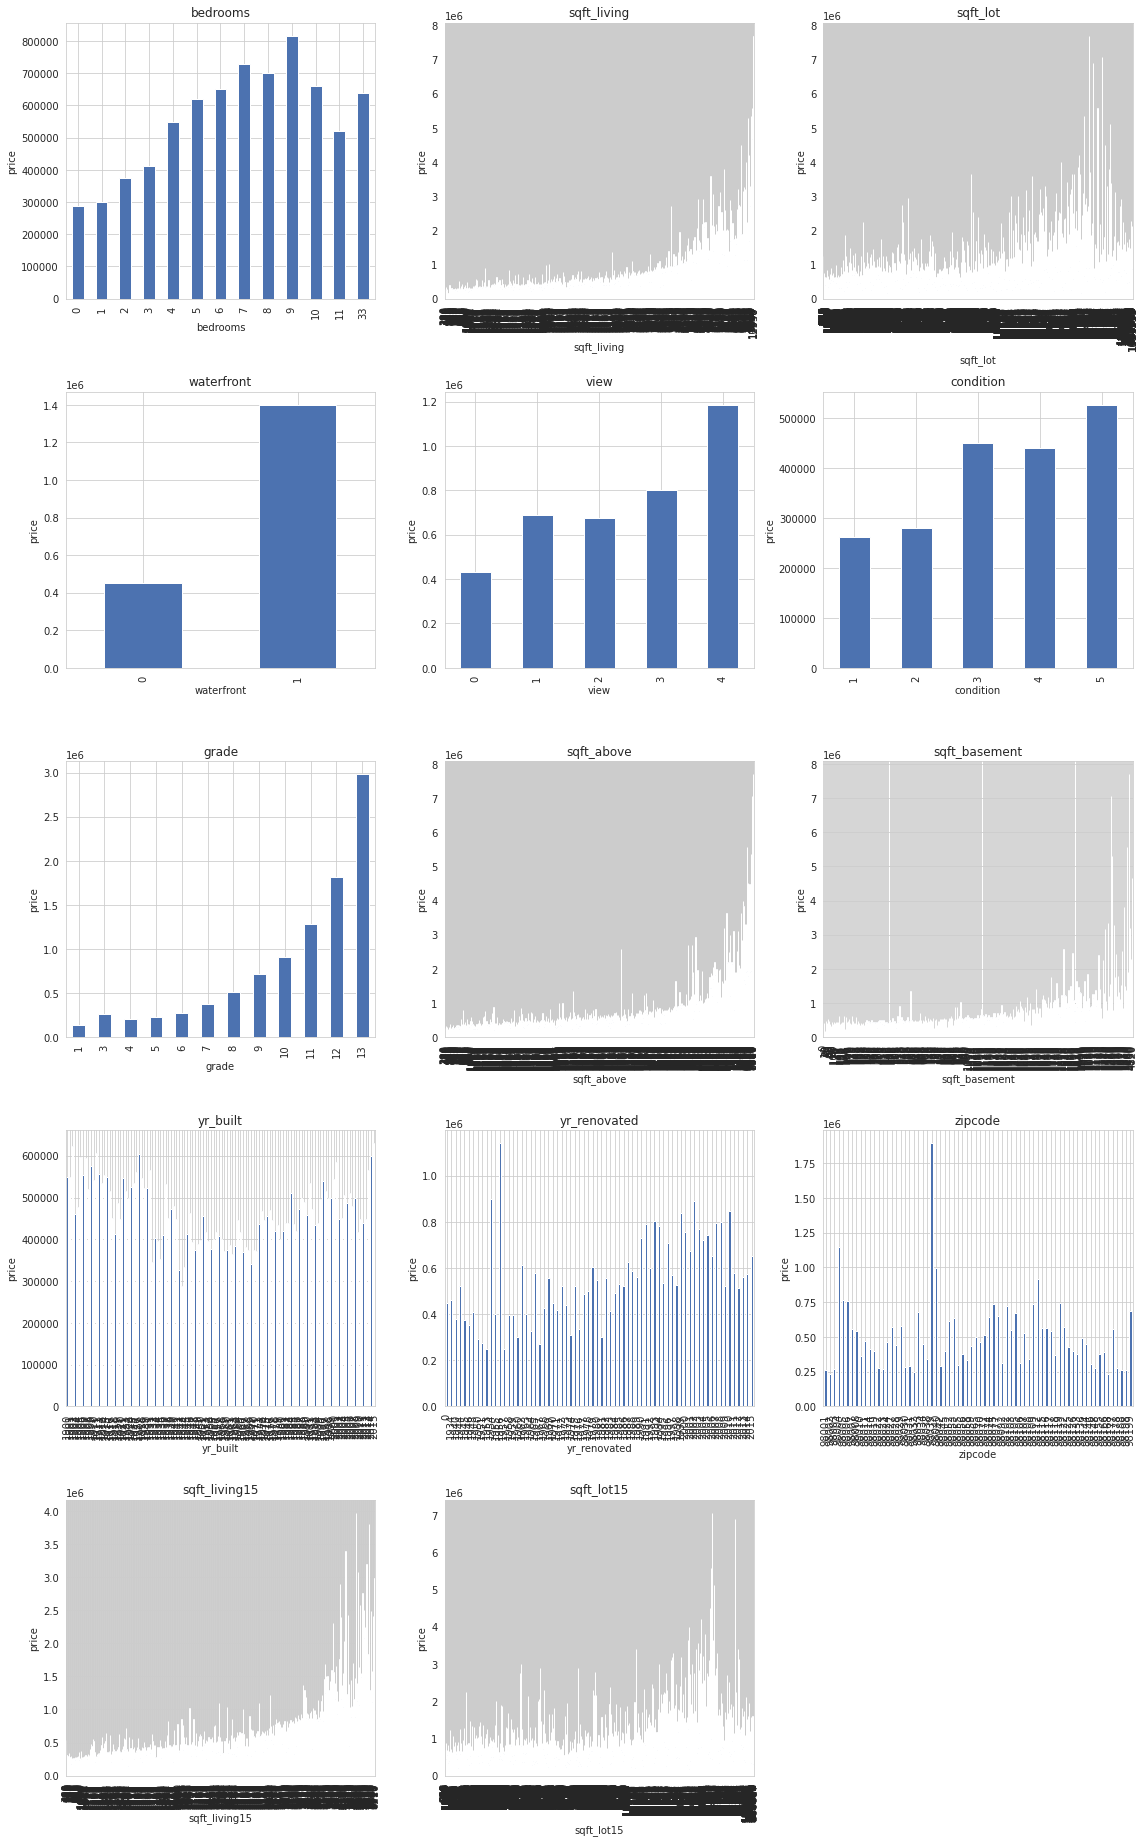

In [ ]:
# plotting discrete numerical features for bar plot patterns

discrete_features = numerical_features.select_dtypes(include=['integer']).drop('id', axis=1)

fig = plt.figure(figsize=(16,30))
for i,feature in enumerate(discrete_features.columns):
    fig.add_subplot(6, 3, i+1)
    data=house_df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
plt.tight_layout()
plt.show()

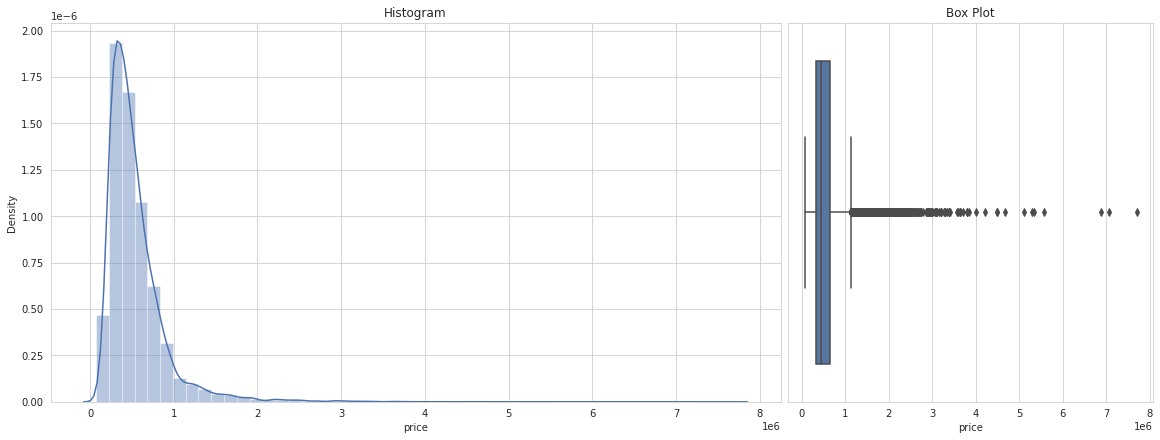

In [11]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(house_df.loc[:,'price'], norm_hist=True, ax = ax1)
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(house_df.loc[:,'price'], orient='v', ax = ax3)
plt.show()

- Our target variable, 'price' is not normally distributed.
- Our target variable is right-skewed.
- There are many outlier in the variable.

Outlier analysis will be done for 'price' feature to make it as normally distributed.

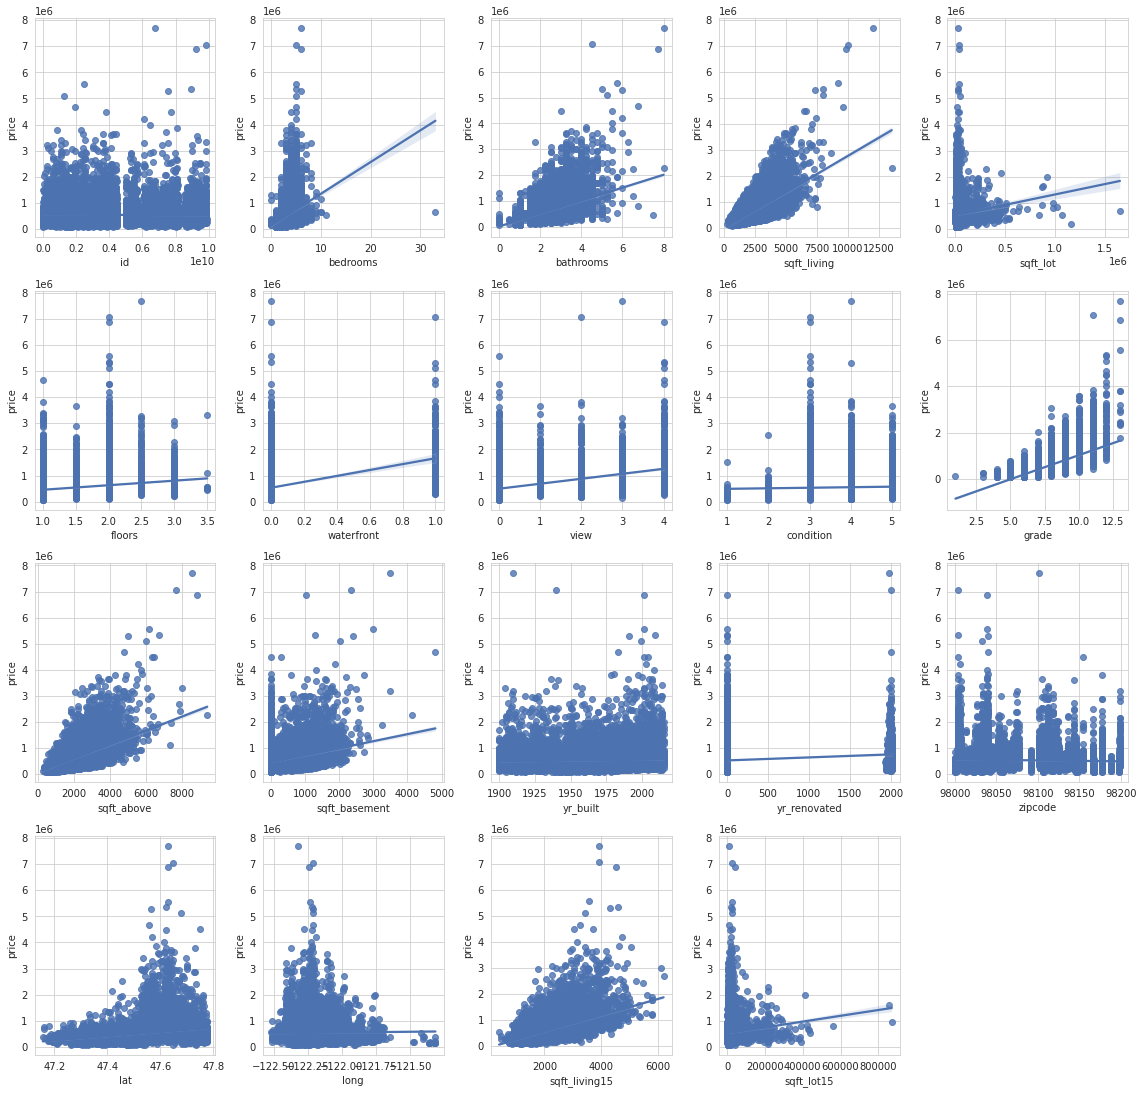

In [ ]:
# scatterplot for correlation analysis of features with 'price'

fig = plt.figure(figsize=(16,30))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(8, 5, i+1)
    sns.regplot(x=numerical_features.iloc[:,i],y=house_df['price'])
plt.tight_layout()
plt.show()

In [ ]:
house_df[house_df.columns[:22]].corr().style.background_gradient(cmap='Blues')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


# Step 3: Data Cleaning

In [12]:
# drop the id and date
house_df.drop(['id', 'date'], axis=1, inplace=True)

# drop the duplicate rows
house_df.drop_duplicates(inplace=True)
datasetShape(house_df)

The dataframe has 21608 rows and 19 columns.


# Step 4: Data Preparation

Outlier Treatment

Treating with the price target feature and other numerical features, which are skewed. We will take log of the feature values using np.log1p()

In [13]:
# extract all skewed features
temp_numerical_features, temp_categorical_features = divideFeatures(house_df)
# remove categorical features stored as int
temp_numerical_features.drop(['waterfront', 'view', 'condition', 'grade'], axis=1, inplace=True)
skewed_features = temp_numerical_features.apply(lambda x: x.skew()).sort_values(ascending=False)

In [14]:
# transform skewed features
for feat in skewed_features.index:
    if skewed_features.loc[feat] > 0.5:
        house_df[feat] = np.log1p(house_df[feat])
        #housing_test[feat] = np.log1p(housing_test[feat])

In [21]:
# transform the output as it was skewed
house_df['price'] = np.log1p(house_df['price'])

Binning features

In [24]:
# house_df waterfront in 2 bins
house_df['waterfront'].replace([0,1], ['No', 'Yes'], inplace=True)


Derive New Features

In [25]:
# feture engineering a new feature "TotalSqft" and "TotalRooms"
house_df['TotalSqft'] = (house_df['sqft_living'] + house_df['sqft_lot'] + house_df['sqft_lot15'] + house_df['sqft_above'] + house_df['sqft_living15'])
house_df['TotalRooms'] = (house_df['bedrooms'] + house_df['bathrooms'])

Create Dummy Features

In [26]:
# extract numerical and categorical for dummy and scaling later
numerical_features, categorical_features = divideFeatures(house_df)
for feat in categorical_features.columns:
    dummyVars = pd.get_dummies(house_df[feat], drop_first=True, prefix=feat+"_")
    house_df = pd.concat([house_df, dummyVars], axis=1)
    house_df.drop(feat, axis=1, inplace=True)


datasetShape(house_df)

The dataframe has 21608 rows and 21 columns.


# Step 5: Data Modelling

Split Train-Test Data

In [38]:
# shuffle samples
df_shuffle = house_df.sample(frac=1, random_state=seed).reset_index(drop=True)

In [39]:
df_y = df_shuffle.pop('price')
df_X = df_shuffle

# split into train dev and test
X_train, X_test, y_train, y_test = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed)
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 15125 records out of 21608 which is 70%
Test set has 6483 records out of 21608 which is 30%


Feature Scaling

In [40]:
scaler = skp.StandardScaler()

# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1
X_train[numerical_features.columns] = scaler.fit_transform(X_train[numerical_features.columns])

y_train = y_train.values.reshape(-1,1)
y_train = scaler.fit_transform(y_train)

# scale test data with transform()
X_test[numerical_features.columns] = scaler.fit_transform(X_test[numerical_features.columns])
y_test = y_test.values.reshape(-1,1)
y_test = scaler.fit_transform(y_test)

# view sample data
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,TotalSqft,TotalRooms,waterfront__Yes
count,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,15125.000000,1.512500e+04,1.512500e+04,0.0,1.512500e+04,1.512500e+04,1.512500e+04,1.512500e+04,15125.000000
mean,6.070736e-16,6.501760e-16,7.056100e-16,-4.350166e-16,3.438792e-16,-1.409341e-17,7.610441e-17,-3.438792e-16,-8.108408e-16,8.456046e-18,-2.254006e-15,0.000000,-1.786081e-14,-2.258469e-14,NaN,2.081127e-15,-1.057945e-15,4.566265e-16,2.522720e-16,0.007603
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033,1.000033e+00,1.000033e+00,NaN,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.086868
min,-6.790586e+00,-4.381469e+00,-3.845283e+00,-2.911266e+00,-9.446179e-01,-3.095860e-01,-3.704104e+00,-3.956799e+00,-3.457488e+00,-7.960159e-01,-2.410470e+00,-0.206746,-1.447446e+00,-2.918241e+00,NaN,-4.299034e+00,-3.038400e+00,-3.123621e+00,-6.251710e+00,0.000000
25%,-3.109711e-01,-7.474113e-01,-6.820144e-01,-5.107530e-01,-9.446179e-01,-3.095860e-01,-6.330865e-01,-5.552653e-01,-7.272971e-01,-7.960159e-01,-6.763364e-01,-0.206746,-8.459835e-01,-6.335011e-01,NaN,-7.073436e-01,-5.187660e-01,-5.788747e-01,-6.232805e-01,0.000000
50%,-3.109711e-01,2.931394e-01,1.584746e-02,-5.898641e-02,1.188562e-01,-3.095860e-01,-6.330865e-01,-5.552653e-01,-9.403096e-02,-7.960159e-01,1.397266e-01,-0.206746,-2.445207e-01,8.484816e-02,NaN,-6.213326e-02,-2.556003e-02,-8.048520e-02,1.551464e-01,0.000000
75%,7.320139e-01,5.870556e-01,6.962618e-01,3.156783e-01,9.877778e-01,-3.095860e-01,9.024223e-01,2.951182e-01,7.208464e-01,1.201051e+00,8.877844e-01,-0.206746,7.516520e-01,8.507511e-01,NaN,6.990905e-01,3.202094e-01,4.710160e-01,7.446419e-01,0.000000
max,9.691814e+00,4.332841e+00,4.628192e+00,5.883054e+00,2.920174e+00,4.847339e+00,2.437931e+00,4.547036e+00,4.111350e+00,1.879710e+00,1.499832e+00,4.843202,2.274105e+00,1.561175e+00,NaN,3.609044e+00,5.814886e+00,5.135140e+00,4.840864e+00,1.000000


ANN model

In [42]:
# Select the variables most correlated with the output to decrease the complexity of 
# the model
house_df[house_df.columns[:22]].corr().style.background_gradient(cmap='Blues')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,TotalSqft,TotalRooms,waterfront__Yes
price,1.000000,0.345572,0.531637,0.674932,0.137698,0.319665,0.346588,0.039546,0.703741,0.586287,0.236494,0.080696,0.114167,-0.038249,0.449173,nan,0.607183,0.122941,0.415756,0.508474,0.174594
bedrooms,0.345572,1.000000,0.537580,0.644064,0.192911,0.200458,0.073504,0.029678,0.378051,0.540678,0.193421,0.183016,0.013256,-0.172294,-0.021317,nan,0.421892,0.171504,0.414035,0.854143,-0.010888
bathrooms,0.531637,0.537580,1.000000,0.764000,0.088374,0.512655,0.167582,-0.117117,0.653608,0.690671,0.193706,0.528412,0.044320,-0.220378,0.015628,nan,0.573354,0.081281,0.412723,0.897673,0.052821
sqft_living,0.674932,0.644064,0.764000,1.000000,0.324074,0.386747,0.246715,-0.048227,0.743908,0.865374,0.282975,0.349508,0.050754,-0.221237,0.039361,nan,0.746100,0.300915,0.682329,0.807772,0.079320
sqft_lot,0.137698,0.192911,0.088374,0.324074,1.000000,-0.220314,0.121705,0.073118,0.183133,0.316940,-0.019107,-0.006920,0.023702,-0.281854,-0.149496,nan,0.363279,0.918718,0.883790,0.155319,0.073793
floors,0.319665,0.200458,0.512655,0.386747,-0.220314,1.000000,0.029055,-0.262800,0.466351,0.569991,-0.271059,0.482642,0.009447,-0.068013,0.041926,nan,0.293812,-0.211263,0.057827,0.420931,0.024055
view,0.346588,0.073504,0.167582,0.246715,0.121705,0.029055,1.000000,0.045819,0.251426,0.158414,0.201960,-0.053196,0.103324,0.084857,0.006047,nan,0.263844,0.118791,0.201446,0.141766,0.401992
condition,0.039546,0.029678,-0.117117,-0.048227,0.073118,-0.262800,0.045819,1.000000,-0.144599,-0.149368,0.150580,-0.361306,-0.060462,0.002998,-0.014975,nan,-0.089070,0.079212,0.007307,-0.056720,0.016648
grade,0.703741,0.378051,0.653608,0.743908,0.183133,0.466351,0.251426,-0.144599,1.000000,0.743634,0.072654,0.446887,0.014043,-0.184875,0.114100,nan,0.688640,0.183586,0.508203,0.600671,0.082799
sqft_above,0.586287,0.540678,0.690671,0.865374,0.316940,0.569991,0.158414,-0.149368,0.743634,1.000000,-0.191369,0.451221,0.026203,-0.289462,-0.018581,nan,0.712582,0.296762,0.673490,0.708518,0.060707


In [43]:
X_train = X_train[["bedrooms", "bathrooms",'sqft_living','sqft_lot', 'floors', 'view', 'sqft_above', 'sqft_basement','lat', 'sqft_living15','TotalSqft','TotalRooms', 'waterfront__Yes']]
X_test = X_test[["bedrooms", "bathrooms",'sqft_living','sqft_lot', 'floors', 'view', 'sqft_above', 'sqft_basement','lat', 'sqft_living15','TotalSqft','TotalRooms', 'waterfront__Yes']]


In [44]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 13, activation = 'relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [47]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2591 - val_loss: 0.1984
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.1908 - val_loss: 0.1751
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.1744 - val_loss: 0.1700
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.1652 - val_loss: 0.1634
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.1609 - val_loss: 0.1722
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.1595 - val_loss: 0.1705
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.1533 - val_loss: 0.1647
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.1536 - val_loss: 0.1600
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.1501 - val_loss: 0.1617
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.1491 - val_lo

Model Evaluation

In [48]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

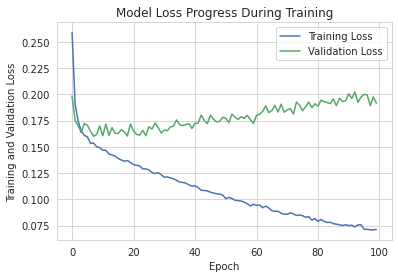

In [49]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

# One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE
# Batch_size is the Total number of training examples present in a single batch. So, you divide dataset 
# into Number of Batches or sets or parts.

203/203 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

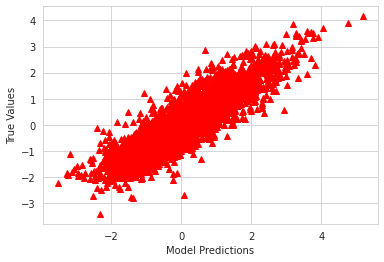

In [50]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [51]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

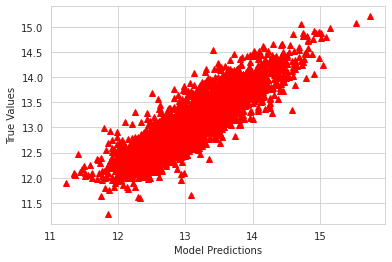

In [53]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
#plt.xlim(0, 5000000)
#plt.ylim(0, 3000000)

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.441 
MSE = 0.1941304502749385 
MAE = 0.32627986544418297 
R2 = 0.8058695497250615 
Adjusted R2 = 0.8054794282451458


# Step 6: Submission

In [55]:
submission = pd.DataFrame(X_test)

In [56]:
submission['Outcome'] = y_test
submission['Predict_Outcome'] = y_predict

In [57]:
submission.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,lat,sqft_living15,TotalSqft,TotalRooms,waterfront__Yes,Outcome,Predict_Outcome
2342,-0.311680,-0.753505,-0.716380,0.096987,-0.952224,-0.296538,-0.348136,-0.801781,-1.921856,0.437387,0.012959,-0.628036,0,-1.382669,-1.278057
19153,0.738098,0.583527,0.574455,0.245569,0.989674,-0.296538,0.933531,-0.801781,0.118725,1.220628,0.583129,0.745517,0,0.705840,0.875742
6112,0.738098,1.355040,1.962588,3.899239,0.989674,-0.296538,2.311806,-0.801781,0.251287,1.643104,2.637580,1.222065,0,1.738623,1.920243
15655,-0.311680,0.583527,-0.433621,-1.141724,0.989674,-0.296538,-0.907090,1.144512,0.923512,-0.522748,-1.073404,0.197821,0,0.406173,0.072887
19922,0.738098,0.583527,-0.115632,-0.070821,-0.952224,-0.296538,-0.686327,1.214704,-0.899030,-0.078490,-0.199037,0.745517,0,-0.850881,-0.824735


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3774da6a-2b92-4d9d-9730-16fdcd2b6547' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>